# Ujian Final PCD 2022 
    Nama : Muhammad Haerul
    NIM  : H071201033
    Kelas: PCD A

In [4]:
import numpy as np
import cv2
import cv2 as cv
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.fft import fft, fftfreq, ifft

### 1. Hilangkan noise periodik pada gambar lena_priodic2.bmp

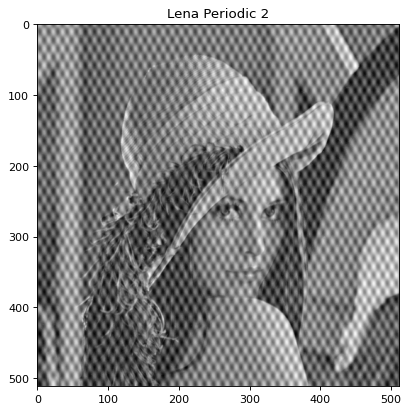

In [164]:
#read img
img = cv2.imread('lena_priodic2.bmp')

#convert img into graysacle
img_grey = rgb2gray(img)

img_grey = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.title(img_grey, text='Lena Periodic 2')
plt.imshow(img_grey, cmap='gray');

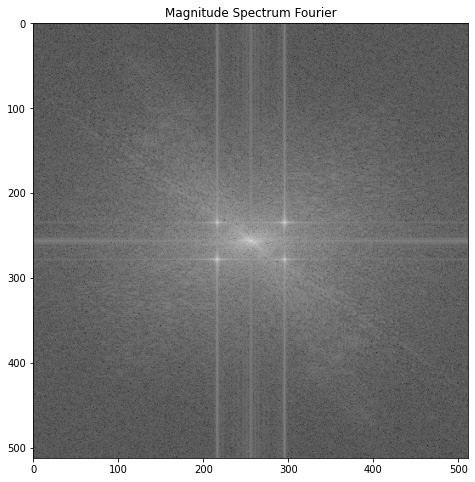

In [165]:
#do Fourier Transform
img_fft = np.fft.fftshift(np.fft.fft2(img_grey))

#show magnitude spectrum Fourier
plt.figure(num=None, figsize=(16, 8))
plt.title(img_fft, text='Magnitude Spectrum Fourier')
plt.imshow(np.log(abs(img_fft+1)), cmap='gray')

In [166]:
#Note: noise frequency
#1. column: 210-220, row: 230-240, 270-280
#2. column: 290-300, row: 230-240, 270-280

#column1:
for j in range(210, 220):
  #row 1
  for i in range(230, 240):
    img_fft[i, j] = 0
  #row 2
  for i in range(274, 284):
    img_fft[i, j] = 0

#column 2:
for j in range(290, 300):
  #row 1
  for i in range(230, 240):
    img_fft[i, j] = 0
  #row 2
  for i in range(270, 280):
    img_fft[i, j] = 0

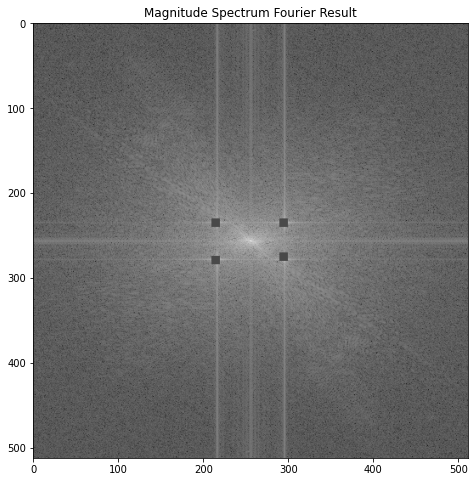

In [167]:
#show magnitude spectrum Fourier again (to see the difference)
plt.figure(num=None, figsize=(16, 8))
plt.title(img_fft, text='Magnitude Spectrum Fourier Result')
plt.imshow(np.log(abs(img_fft+1)), cmap='gray')

In [168]:
#invers the img_fft
img_ifft = np.fft.ifft2(np.fft.ifftshift(img_fft)).real

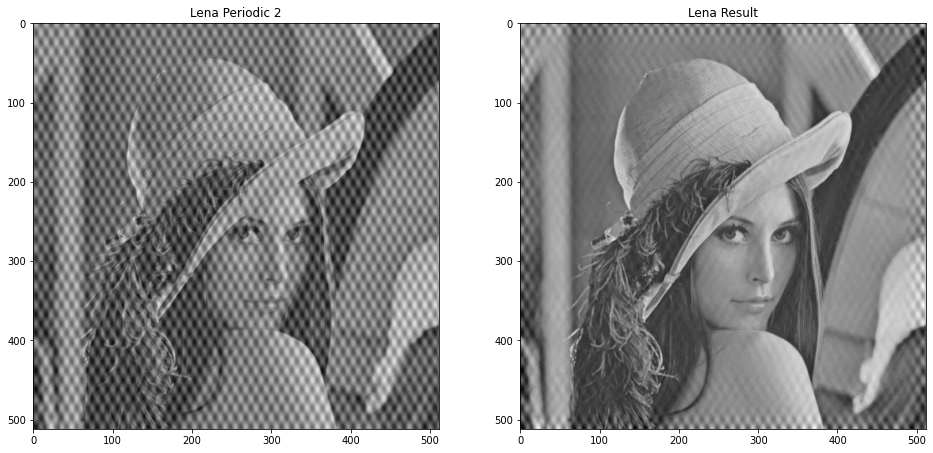

In [169]:
#show the result img
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].imshow(img)
ax[0].set_title('Lena Periodic 2')
ax[1].imshow(img_ifft, cmap='gray')
ax[1].set_title('Lena Result')
plt.show()

### 2. Lakukan deteksi tepi menggunakan operator Prewitt pada citra phone_noise.png dengan terlebih dahulu memproses median filter pada citra tersebut.


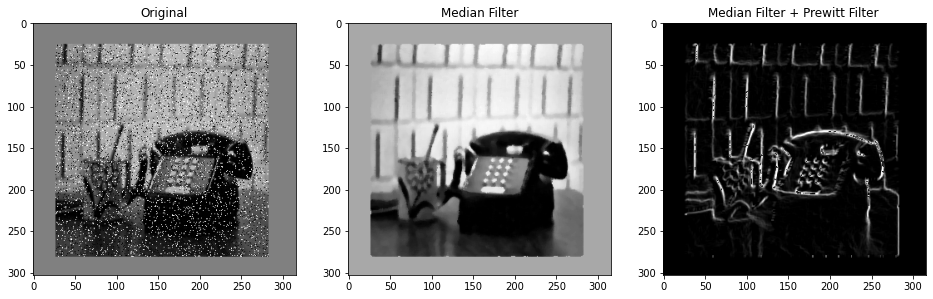

In [170]:
#read img
img = cv.imread('phone_noise.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Median filter
img_median = cv.medianBlur(img_gray, 5)

#Prewitt filter (x and y)
prewittX = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewittY = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittX = cv.filter2D(img_median, -1, prewittX)
img_prewittY = cv.filter2D(img_median, -1, prewittY)
img_prewittXY = img_prewittX + img_prewittY

#show imgs
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(img_median, cmap='gray')
ax[1].set_title('Median Filter')
ax[2].imshow(img_prewittXY, cmap='gray')
ax[2].set_title('Median Filter + Prewitt Filter ')
plt.show()

### 3. Hilangkan semua bagian yang berlubang pada citra coins-binary.png

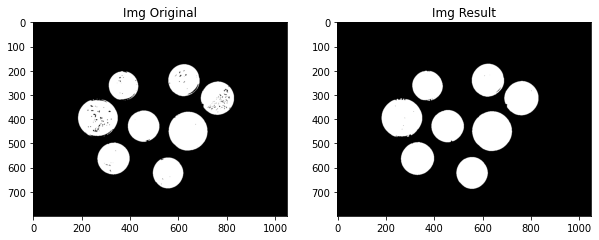

In [21]:
#read img
img = cv.imread('coins-binary.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#transform img to binary img using Threshold
ret, thresh = cv2.threshold(imgray, 100, 255, 0)

#find the img contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#draw contours
img_result = cv2.drawContours(thresh, contours, -1, (255,255,255), 3)

#show imgs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Img Original')
ax[1].imshow(img_result, cmap='gray')
ax[1].set_title('Img Result')
plt.show()


### 4. Segmentasi citra lena_color.tif menggunakan K-Mean clustering dengan k=3

In [172]:
#read img
img = cv.imread('lena-color.tif')
img_RGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

#reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = img_RGB.reshape((-1, 3))

#convert to float
pixel_values = np.float32(pixel_values)

#print pixel values
print(pixel_values.shape)

(262144, 3)


In [173]:
#define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [174]:
#convert back to 8 bit values
centers = np.uint8(centers)

#flatten the labels array
labels = labels.flatten()

#convert all pixels to the color of the centroids
segmented_img= centers[labels.flatten()]

#reshape back to the original image dimension
segmented_img = segmented_img.reshape(img_RGB.shape)

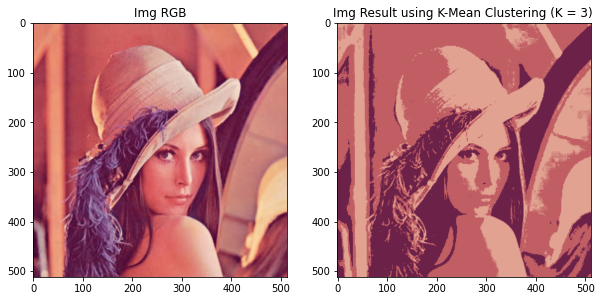

In [177]:
#show imgs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_RGB)
ax[0].set_title('Img RGB')
ax[1].imshow(segmented_img)
ax[1].set_title('Img Result using K-Mean Clustering (K = 3) ')
plt.show()